# Introduction to Convolutional Neural Network and Computer Vision with TensorFlow

In [1]:
# import the libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# inspect the data
import os

# walk throught the pizza_steak and list number of files

for dirpath, dirnames, filenames in os.walk("../pizza_steak"):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in ../pizza_steak.
There are 2 directories and 0 images in ../pizza_steak\test.
There are 0 directories and 250 images in ../pizza_steak\test\pizza.
There are 0 directories and 250 images in ../pizza_steak\test\steak.
There are 2 directories and 0 images in ../pizza_steak\train.
There are 0 directories and 750 images in ../pizza_steak\train\pizza.
There are 0 directories and 750 images in ../pizza_steak\train\steak.


In [5]:
# Another way to find out how many images in a directory
num_steak_images_train = len(os.listdir("../pizza_steak/train/steak"))
num_steak_images_train

750

## Visualize the food images

In [6]:
# Get the classnames programatically
import pathlib
import numpy as np

In [7]:
data_dir = pathlib.Path("../pizza_steak/train")
# Create a list of classname from sub directories
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [11]:
# Let's visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # setup the target directory
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    # Show the shape of the image
    print(f"Image shape: {img.shape}")
    
    return img

['9555.jpg']
Image shape: (384, 512, 3)


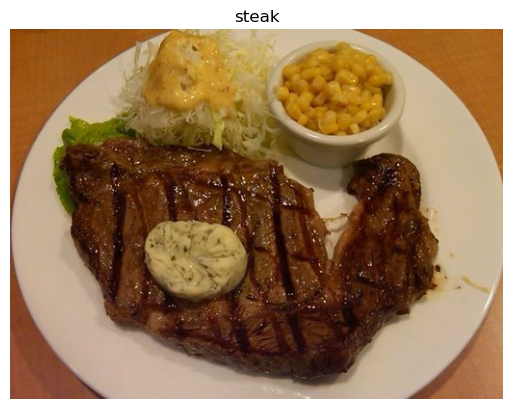

In [17]:
# View a random image from the training dataset
img = view_random_image(target_dir="../pizza_steak/train/", target_class="steak")

['138855.jpg']
Image shape: (384, 512, 3)


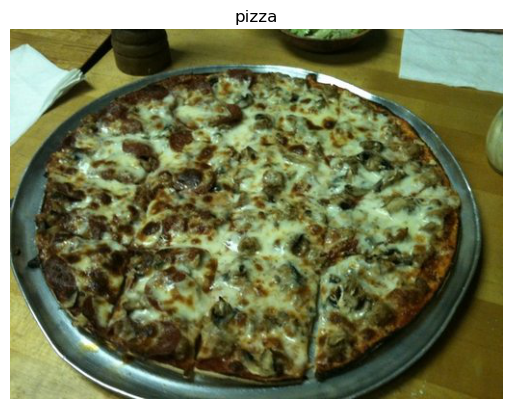

In [29]:
img = view_random_image(target_dir="../pizza_steak/train/", target_class="pizza")

> Reason why `img` is returned in the function is that when `mpimg` read the image, it is turned to numpy array.

In [30]:
img

array([[[137, 132,  51],
        [129, 124,  43],
        [121, 116,  35],
        ...,
        [ 88,  77,  55],
        [ 89,  77,  53],
        [ 90,  78,  54]],

       [[121, 114,  36],
        [124, 117,  39],
        [130, 123,  45],
        ...,
        [ 85,  77,  56],
        [ 84,  76,  53],
        [ 86,  75,  53]],

       [[114, 106,  31],
        [118, 110,  35],
        [124, 116,  41],
        ...,
        [ 77,  75,  54],
        [ 81,  76,  56],
        [ 81,  76,  56]],

       ...,

       [[183, 190, 123],
        [184, 191, 124],
        [183, 190, 123],
        ...,
        [ 83,  67,   8],
        [ 81,  65,   6],
        [ 80,  64,   5]],

       [[176, 183, 116],
        [179, 186, 119],
        [178, 185, 118],
        ...,
        [ 83,  67,   8],
        [ 82,  66,   7],
        [ 81,  65,   6]],

       [[173, 180, 113],
        [176, 183, 116],
        [172, 178, 114],
        ...,
        [ 81,  65,   5],
        [ 80,  64,   5],
        [ 80,  64,   5]]

In [31]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[137, 132,  51],
        [129, 124,  43],
        [121, 116,  35],
        ...,
        [ 88,  77,  55],
        [ 89,  77,  53],
        [ 90,  78,  54]],

       [[121, 114,  36],
        [124, 117,  39],
        [130, 123,  45],
        ...,
        [ 85,  77,  56],
        [ 84,  76,  53],
        [ 86,  75,  53]],

       [[114, 106,  31],
        [118, 110,  35],
        [124, 116,  41],
        ...,
        [ 77,  75,  54],
        [ 81,  76,  56],
        [ 81,  76,  56]],

       ...,

       [[183, 190, 123],
        [184, 191, 124],
        [183, 190, 123],
        ...,
        [ 83,  67,   8],
        [ 81,  65,   6],
        [ 80,  64,   5]],

       [[176, 183, 116],
        [179, 186, 119],
        [178, 185, 118],
        ...,
        [ 83,  67,   8],
        [ 82,  66,   7],
        [ 81,  65,   6]],

       [[173, 180, 113],
        [176, 183, 116],
        [172, 178, 114],
        ...,
        [ 81,  65,   

**Note:** Many machine learning models, including neural network prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working is to **scale (normalize)** their pixel values by dividing the image arrays by 255. (Since 255 is the maximum pixel value).

In [32]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.5372549 , 0.51764706, 0.2       ],
        [0.50588235, 0.48627451, 0.16862745],
        [0.4745098 , 0.45490196, 0.1372549 ],
        ...,
        [0.34509804, 0.30196078, 0.21568627],
        [0.34901961, 0.30196078, 0.20784314],
        [0.35294118, 0.30588235, 0.21176471]],

       [[0.4745098 , 0.44705882, 0.14117647],
        [0.48627451, 0.45882353, 0.15294118],
        [0.50980392, 0.48235294, 0.17647059],
        ...,
        [0.33333333, 0.30196078, 0.21960784],
        [0.32941176, 0.29803922, 0.20784314],
        [0.3372549 , 0.29411765, 0.20784314]],

       [[0.44705882, 0.41568627, 0.12156863],
        [0.4627451 , 0.43137255, 0.1372549 ],
        [0.48627451, 0.45490196, 0.16078431],
        ...,
        [0.30196078, 0.29411765, 0.21176471],
        [0.31764706, 0.29803922, 0.21960784],
        [0.31764706, 0.29803922, 0.21960784]],

       ...,

       [[0.71764706, 0.74509804, 0.48235294],
        [0.72156863, 0.74901961, 0.48627451],
        [0.71764706, 0

## An end-to-end Example

Let's build a convolutional neural network to find patterns in our images, more specifically we are to:
- Load our images
- Preprocess our images
- Build our CNN to find patterns
- Compile our CNN
- Fit the CNN to our training data

In [33]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
# Set the seed
tf.random.set_seed(42)

# Preprocess the data (Scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set path to the data directory
train_dir = "../pizza_steak/train"
test_dir = "../pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224,224), 
                                               class_mode="binary", seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [38]:
len(train_data)

47

In [39]:
1500 / 32 # 32 is the batch size

46.875

In [40]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    # VGG -> Notice 2 Conv2D and 1 MaxPooling2D
    tf.keras.layers.Conv2D(filters=10, 
                           kernel_size=3, 
                           activation='relu', 
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(2),
    # Flatten the images before the output layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data))

Epoch 1/5
47/47 [==============================] - 41s 844ms/step - loss: 0.6063 - accuracy: 0.6613
Epoch 2/5
47/47 [==============================] - 44s 927ms/step - loss: 0.4682 - accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 44s 935ms/step - loss: 0.4026 - accuracy: 0.8287
Epoch 4/5
47/47 [==============================] - 44s 930ms/step - loss: 0.3871 - accuracy: 0.8393
Epoch 5/5
47/47 [==============================] - 44s 939ms/step - loss: 0.3257 - accuracy: 0.8640
